In [52]:
import pandas as pd

In [53]:
import seaborn as sns

In [54]:
import matplotlib.pyplot as plt

In [55]:
import numpy as np

In [5]:
filename = "sweep_welfare_maximixer_recommender.csv"

In [18]:
heuristic_file = "sweep_heuristic_recommender.csv"

In [19]:
no_recommender_file = "sweep_e101_q6_SELFISH_EPSILON_AVERAGE_N100_S1_A3_n0_I10000_eVariable_g0_a0.01_qVariable .csv"

In [20]:
df = pd.read_csv(filename)

In [21]:
df2 = pd.read_csv(heuristic_file)

In [22]:
df3 = pd.read_csv(no_recommender_file)

In [23]:
df["random_recommender"] = df["random_recommender"].fillna("none")

In [25]:
means_optimize = df.groupby(["random_recommender", "epsilon"]).mean()
means_heuristic = df2.groupby(["recommender_type", "norm", "epsilon"]).mean()
means_no_recommender = df3.groupby(["norm", "epsilon"]).mean()

In [26]:
def welfare(epsilon):
    return - (2 - 2/3*epsilon + 2/9*epsilon**2)

In [27]:
means_heuristic

Unnamed: 0    T_mean     T_std  Lyapunov  \
recommender_type norm    epsilon                                             
heuristic        aligned 0.00           84.5 -2.000000  0.000000       NaN   
                         0.01          204.5 -1.688513  0.069817  0.009782   
                         0.02          324.5 -1.718475  0.089873  0.017761   
                         0.03          444.5 -1.752355  0.094552  0.018763   
                         0.04          564.5 -1.780062  0.093152  0.019378   
...                                      ...       ...       ...       ...   
random           uniform 0.45         1584.5 -1.747749  0.032074  0.011679   
                         0.60         1704.5 -1.682996  0.029207  0.012077   
                         0.75         1824.5 -1.628488  0.025156  0.012121   
                         0.90         1944.5 -1.584133  0.020050  0.012423   
                         1.00         2064.5 -1.560009  0.016324  0.012376   

                                  repetition  groups_mean  groups_var  \
recommender_type norm    epsilon                                        
heuristic        aligned 0.00            4.5      2.00000    0.000000   
                         0.01            4.5      9.21215   28.656667   
                         0.02            4.5      6.83230   23.957380   
                         0.03            4.5      5.78135   19.749473   
                         0.04            4.5      5.03391   16.673432   
...                                      ...          ...         ...   
random           uniform 0.45            4.5      2.64555   29.819179   
                         0.60            4.5      2.65122   31.038345   
                         0.75            4.5      2.67548   34.051471   
                         0.90            4.5      2.68640   36.168204   
                         1.00            4.5      2.70133   37.250403   

                                     Qvar_mean  alignment_up  alignment_down  \
recommender_type norm    epsilon                                               
heuristic        aligned 0.00     2.247958e-31      1.000000        1.000000   
                         0.01     1.533720e-02      0.082076        0.090303   
                         0.02     1.025245e-02      0.067062        0.063395   
                         0.03     8.163032e-03      0.055018        0.057605   
                         0.04     6.338968e-03      0.043517        0.041162   
...                                        ...           ...             ...   
random           uniform 0.45     4.840499e-04      0.000000        0.000000   
                         0.60     4.697273e-04      0.000000        0.000000   
                         0.75     4.676649e-04      0.000000        0.000000   
                         0.90     4.639636e-04      0.000000        0.000000   
                         1.00     4.719398e-04      0.000000        0.000000   

                                  alignment_cross  
recommender_type norm    epsilon                   
heuristic        aligned 0.00            1.000000  
                         0.01            0.929176  
                         0.02            0.903259  
                         0.03            0.921767  
                         0.04            0.920494  
...                                           ...  
random           uniform 0.45            1.000000  
                         0.60            1.000000  
                         0.75            1.000000  
                         0.90            1.000000  
                         1.00            1.000000  

[216 rows x 11 columns]

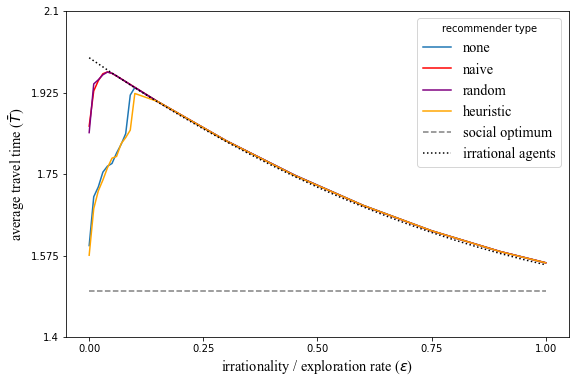

In [46]:
norms = df.norm.unique().tolist()
opt = np.ones(21) * -1.5
x_vals = np.linspace(0, 1, 21)
y_vals = welfare(x_vals)

plt.figure(figsize=(9,6))

means_heuristic.loc["none", "uniform"]["T_mean"].plot(legend=True, label="none", color=u'#1f77b4')
# means_no_recommender.loc["uniform"]["T_mean"].plot(legend=True, label="none", color=u'#1f77b4')
means_heuristic.loc["naive", "uniform"]["T_mean"].plot(legend=True, label="naive", color="red")
means_heuristic.loc["random", "uniform"]["T_mean"].plot(legend=True, label="random", color="purple")
means_heuristic.loc["heuristic", "uniform"]["T_mean"].plot(legend=True, label="heuristic", color="orange")

plt.ylim((-1.4, -2.1))
plt.yticks(ticks=np.linspace(-1.4, -2.1, 5), labels=np.linspace(1.4, 2.1, 5))

plt.xticks(ticks=np.linspace(0, 1, 5))

plt.plot(x_vals, opt, label="social optimum", linestyle="--", color="gray")
plt.plot(x_vals, y_vals, label="irrational agents", linestyle=":", color="black")
plt.xlabel(r"irrationality / exploration rate ($\epsilon$)", **{"fontname": "Times New Roman", "fontsize": "x-large"})
plt.ylabel(r"average travel time ($\bar{T}$)", **{"fontname": "Times New Roman", "fontsize": "x-large"})
plt.legend(prop={"family": "Times New Roman", "size": "x-large"}, title="recommender type")

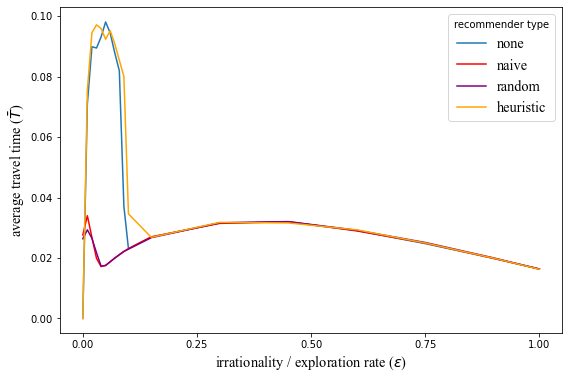

In [49]:
norms = df.norm.unique().tolist()
opt = np.ones(21) * -1.5
x_vals = np.linspace(0, 1, 21)
y_vals = welfare(x_vals)

plt.figure(figsize=(9,6))

means_heuristic.loc["none", "uniform"]["T_std"].plot(legend=True, label="none", color=u'#1f77b4')
# means_no_recommender.loc["uniform"]["T_mean"].plot(legend=True, label="none", color=u'#1f77b4')
means_heuristic.loc["naive", "uniform"]["T_std"].plot(legend=True, label="naive", color="red")
means_heuristic.loc["random", "uniform"]["T_std"].plot(legend=True, label="random", color="purple")
means_heuristic.loc["heuristic", "uniform"]["T_std"].plot(legend=True, label="heuristic", color="orange")

# plt.ylim((-1.4, -2.1))
# plt.yticks(ticks=np.linspace(-1.4, -2.1, 5), labels=np.linspace(1.4, 2.1, 5))

plt.xticks(ticks=np.linspace(0, 1, 5))

# plt.plot(x_vals, opt, label="social optimum", linestyle="--", color="gray")
# plt.plot(x_vals, y_vals, label="irrational agents", linestyle=":", color="black")
plt.xlabel(r"irrationality / exploration rate ($\epsilon$)", **{"fontname": "Times New Roman", "fontsize": "x-large"})
plt.ylabel(r"average travel time ($\bar{T}$)", **{"fontname": "Times New Roman", "fontsize": "x-large"})
plt.legend(prop={"family": "Times New Roman", "size": "x-large"}, title="recommender type")

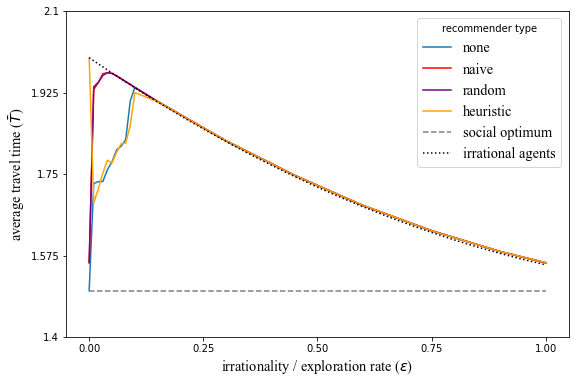

In [42]:
norms = df.norm.unique().tolist()
opt = np.ones(21) * -1.5
x_vals = np.linspace(0, 1, 21)
y_vals = welfare(x_vals)

plt.figure(figsize=(9,6))

means_heuristic.loc["none", "aligned"]["T_mean"].plot(legend=True, label="none", color=u'#1f77b4')
means_heuristic.loc["naive", "aligned"]["T_mean"].plot(legend=True, label="naive", color="red")
means_heuristic.loc["random", "aligned"]["T_mean"].plot(legend=True, label="random", color="purple")
means_heuristic.loc["heuristic", "aligned"]["T_mean"].plot(legend=True, label="heuristic", color="orange")

plt.ylim((-1.4, -2.1))
plt.yticks(ticks=np.linspace(-1.4, -2.1, 5), labels=np.linspace(1.4, 2.1, 5))

plt.xticks(ticks=np.linspace(0, 1, 5))

plt.plot(x_vals, opt, label="social optimum", linestyle="--", color="gray")
plt.plot(x_vals, y_vals, label="irrational agents", linestyle=":", color="black")
plt.xlabel(r"irrationality / exploration rate ($\epsilon$)", **{"fontname": "Times New Roman", "fontsize": "x-large"})
plt.ylabel(r"average travel time ($\bar{T}$)", **{"fontname": "Times New Roman", "fontsize": "x-large"})
plt.legend(prop={"family": "Times New Roman", "size": "x-large"}, title="recommender type")

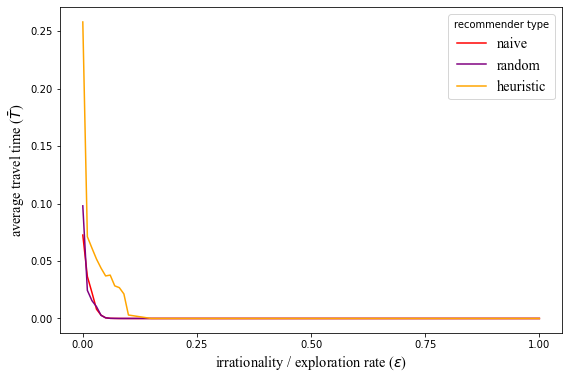

In [51]:
norms = df.norm.unique().tolist()
opt = np.ones(21) * -1.5
x_vals = np.linspace(0, 1, 21)
y_vals = welfare(x_vals)

plt.figure(figsize=(9,6))

# means_heuristic.loc["none", "uniform"]["alignment_up"].plot(legend=True, label="none", color=u'#1f77b4')
means_heuristic.loc["naive", "uniform"]["alignment_up"].plot(legend=True, label="naive", color="red")
means_heuristic.loc["random", "uniform"]["alignment_up"].plot(legend=True, label="random", color="purple")
means_heuristic.loc["heuristic", "uniform"]["alignment_up"].plot(legend=True, label="heuristic", color="orange")

# plt.ylim((-1.4, -2.1))
# plt.yticks(ticks=np.linspace(-1.4, -2.1, 5), labels=np.linspace(1.4, 2.1, 5))

plt.xticks(ticks=np.linspace(0, 1, 5))

# plt.plot(x_vals, opt, label="social optimum", linestyle="--", color="gray")
# plt.plot(x_vals, y_vals, label="irrational agents", linestyle=":", color="black")
plt.xlabel(r"irrationality / exploration rate ($\epsilon$)", **{"fontname": "Times New Roman", "fontsize": "x-large"})
plt.ylabel(r"average travel time ($\bar{T}$)", **{"fontname": "Times New Roman", "fontsize": "x-large"})
plt.legend(prop={"family": "Times New Roman", "size": "x-large"}, title="recommender type")

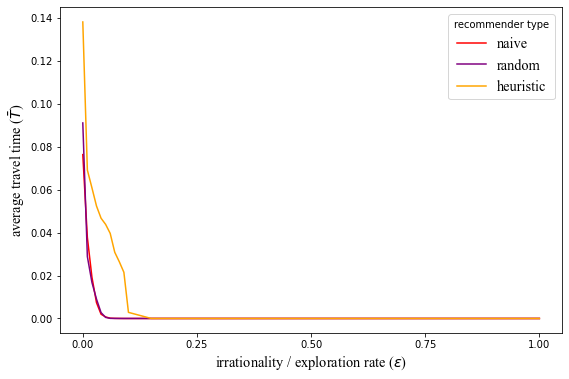

In [50]:
norms = df.norm.unique().tolist()
opt = np.ones(21) * -1.5
x_vals = np.linspace(0, 1, 21)
y_vals = welfare(x_vals)

plt.figure(figsize=(9,6))

# means_heuristic.loc["none", "uniform"]["alignment_down"].plot(legend=True, label="none", color=u'#1f77b4')
means_heuristic.loc["naive", "uniform"]["alignment_down"].plot(legend=True, label="naive", color="red")
means_heuristic.loc["random", "uniform"]["alignment_down"].plot(legend=True, label="random", color="purple")
means_heuristic.loc["heuristic", "uniform"]["alignment_down"].plot(legend=True, label="heuristic", color="orange")

# plt.ylim((-1.4, -2.1))
# plt.yticks(ticks=np.linspace(-1.4, -2.1, 5), labels=np.linspace(1.4, 2.1, 5))

plt.xticks(ticks=np.linspace(0, 1, 5))

# plt.plot(x_vals, opt, label="social optimum", linestyle="--", color="gray")
# plt.plot(x_vals, y_vals, label="irrational agents", linestyle=":", color="black")
plt.xlabel(r"irrationality / exploration rate ($\epsilon$)", **{"fontname": "Times New Roman", "fontsize": "x-large"})
plt.ylabel(r"average travel time ($\bar{T}$)", **{"fontname": "Times New Roman", "fontsize": "x-large"})
plt.legend(prop={"family": "Times New Roman", "size": "x-large"}, title="recommender type")

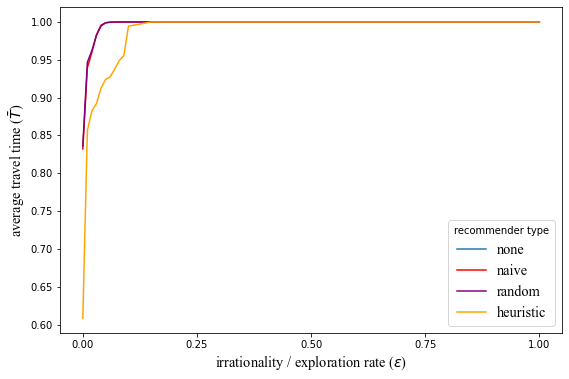

In [39]:
norms = df.norm.unique().tolist()
opt = np.ones(21) * -1.5
x_vals = np.linspace(0, 1, 21)
y_vals = welfare(x_vals)

plt.figure(figsize=(9,6))

means_heuristic.loc["none", "uniform"]["alignment_cross"].plot(legend=True, label="none", color=u'#1f77b4')
means_heuristic.loc["naive", "uniform"]["alignment_cross"].plot(legend=True, label="naive", color="red")
means_heuristic.loc["random", "uniform"]["alignment_cross"].plot(legend=True, label="random", color="purple")
means_heuristic.loc["heuristic", "uniform"]["alignment_cross"].plot(legend=True, label="heuristic", color="orange")

# plt.ylim((-1.4, -2.1))
# plt.yticks(ticks=np.linspace(-1.4, -2.1, 5), labels=np.linspace(1.4, 2.1, 5))

plt.xticks(ticks=np.linspace(0, 1, 5))

# plt.plot(x_vals, opt, label="social optimum", linestyle="--", color="gray")
# plt.plot(x_vals, y_vals, label="irrational agents", linestyle=":", color="black")
plt.xlabel(r"irrationality / exploration rate ($\epsilon$)", **{"fontname": "Times New Roman", "fontsize": "x-large"})
plt.ylabel(r"average travel time ($\bar{T}$)", **{"fontname": "Times New Roman", "fontsize": "x-large"})
plt.legend(prop={"family": "Times New Roman", "size": "x-large"}, title="recommender type")

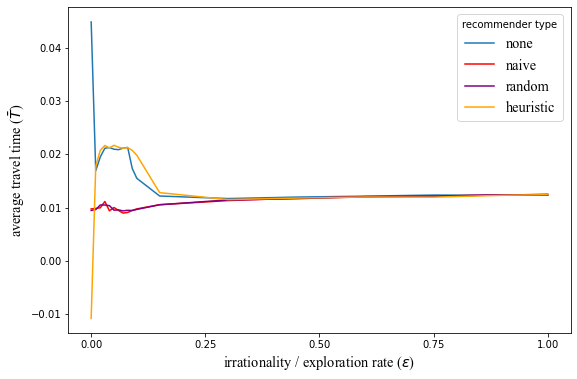

In [40]:
norms = df.norm.unique().tolist()
opt = np.ones(21) * -1.5
x_vals = np.linspace(0, 1, 21)
y_vals = welfare(x_vals)

plt.figure(figsize=(9,6))

means_heuristic.loc["none", "uniform"]["Lyapunov"].plot(legend=True, label="none", color=u'#1f77b4')
means_heuristic.loc["naive", "uniform"]["Lyapunov"].plot(legend=True, label="naive", color="red")
means_heuristic.loc["random", "uniform"]["Lyapunov"].plot(legend=True, label="random", color="purple")
means_heuristic.loc["heuristic", "uniform"]["Lyapunov"].plot(legend=True, label="heuristic", color="orange")

# plt.ylim((-1.4, -2.1))
# plt.yticks(ticks=np.linspace(-1.4, -2.1, 5), labels=np.linspace(1.4, 2.1, 5))

plt.xticks(ticks=np.linspace(0, 1, 5))

# plt.plot(x_vals, opt, label="social optimum", linestyle="--", color="gray")
# plt.plot(x_vals, y_vals, label="irrational agents", linestyle=":", color="black")
plt.xlabel(r"irrationality / exploration rate ($\epsilon$)", **{"fontname": "Times New Roman", "fontsize": "x-large"})
plt.ylabel(r"average travel time ($\bar{T}$)", **{"fontname": "Times New Roman", "fontsize": "x-large"})
plt.legend(prop={"family": "Times New Roman", "size": "x-large"}, title="recommender type")

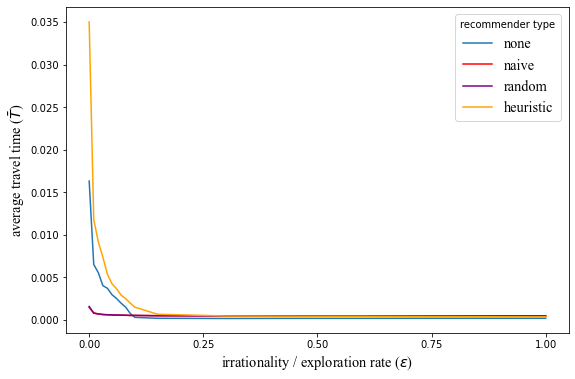

In [41]:
norms = df.norm.unique().tolist()
opt = np.ones(21) * -1.5
x_vals = np.linspace(0, 1, 21)
y_vals = welfare(x_vals)

plt.figure(figsize=(9,6))

means_heuristic.loc["none", "uniform"]["Qvar_mean"].plot(legend=True, label="none", color=u'#1f77b4')
means_heuristic.loc["naive", "uniform"]["Qvar_mean"].plot(legend=True, label="naive", color="red")
means_heuristic.loc["random", "uniform"]["Qvar_mean"].plot(legend=True, label="random", color="purple")
means_heuristic.loc["heuristic", "uniform"]["Qvar_mean"].plot(legend=True, label="heuristic", color="orange")

# plt.ylim((-1.4, -2.1))
# plt.yticks(ticks=np.linspace(-1.4, -2.1, 5), labels=np.linspace(1.4, 2.1, 5))

plt.xticks(ticks=np.linspace(0, 1, 5))

# plt.plot(x_vals, opt, label="social optimum", linestyle="--", color="gray")
# plt.plot(x_vals, y_vals, label="irrational agents", linestyle=":", color="black")
plt.xlabel(r"irrationality / exploration rate ($\epsilon$)", **{"fontname": "Times New Roman", "fontsize": "x-large"})
plt.ylabel(r"average travel time ($\bar{T}$)", **{"fontname": "Times New Roman", "fontsize": "x-large"})
plt.legend(prop={"family": "Times New Roman", "size": "x-large"}, title="recommender type")

In [63]:
filename_optimizer_test = "sweep_test_optimized_recommenders.csv"
df_optimizer_test = pd.read_csv(filename_optimizer_test)

In [64]:
means_optimizer_test = df_optimizer_test.groupby(["recommender_type", "norm", "epsilon"]).mean()

In [65]:
df_optimizer_test

,Unnamed: 0,epsilon,norm,T_mean,T_mean_all,T_std,Lyapunov,repetition,groups_mean,groups_var,Qvar_mean,recommender_type,alignment_up,alignment_down,alignment_cross
0,0,0.0,uniform,-1.561300,-1.561095,2.220446e-16,-0.115722,0,24.4180,5.769876,0.036050,heuristic,0.22,0.14,0.57
1,1,0.0,uniform,-1.522100,-1.522110,2.220446e-16,-0.042303,1,31.0564,2.124419,0.040944,heuristic,0.32,0.18,0.49
2,2,0.0,uniform,-1.576100,-1.575820,2.220446e-16,0.002422,2,24.4968,7.759390,0.036716,heuristic,0.26,0.14,0.64
3,3,0.0,uniform,-1.528800,-1.528680,0.000000e+00,0.015068,0,32.1562,4.026202,0.035954,optimized_action_minimize,0.19,0.20,0.59
4,4,0.0,uniform,-1.524200,-1.523848,2.220446e-16,0.007730,1,27.1920,3.758336,0.033150,optimized_action_minimize,0.21,0.23,0.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,163,0.2,uniform,-1.875909,-1.870706,2.895299e-02,0.011306,1,2.6673,27.587411,0.000503,random,0.00,0.00,1.00
164,164,0.2,uniform,-1.876173,-1.870568,2.823387e-02,0.011097,2,2.6508,28.187859,0.000466,random,0.00,0.00,1.00
165,165,0.2,uniform,-1.877536,-1.874840,2.897278e-02,0.011234,0,2.2035,8.522688,0.000181,none,NaN,NaN,NaN
166,166,0.2,uniform,-1.877065,-1.874889,2.944670e-02,0.011814,1,2.1972,8.060312,0.000163,none,NaN,NaN,NaN


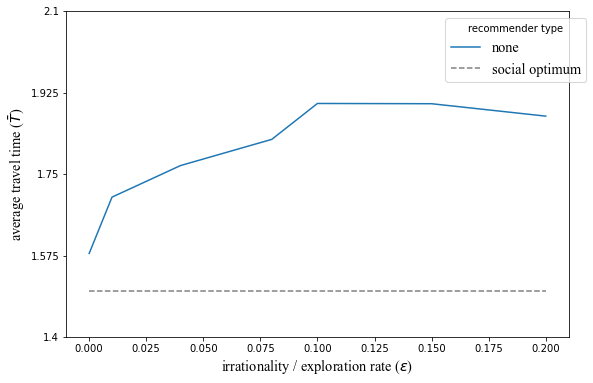

In [85]:
norms = df.norm.unique().tolist()
opt = np.ones(21) * -1.5
x_vals = np.linspace(0, 0.2, 21)
y_vals = welfare(x_vals)

plt.figure(figsize=(9,6))

means_optimizer_test.loc["none", "uniform"]["T_mean_all"].plot(legend=True, label="none", color=u'#1f77b4')
# means_no_recommender.loc["uniform"]["T_mean"].plot(legend=True, label="none", color=u'#1f77b4')
# means_optimizer_test.loc["naive", "uniform"]["T_mean_all"].plot(legend=True, label="naive", color="red")
# means_optimizer_test.loc["random", "uniform"]["T_mean_all"].plot(legend=True, label="random", color="purple")
# means_optimizer_test.loc["heuristic", "uniform"]["T_mean_all"].plot(legend=True, label="heuristic", color="orange")
ali
# means_optimizer_test.loc["optimized_action_minimize", "uniform"]["T_mean_all"].plot(legend=True, label="optimized_action_minimize")
# means_optimizer_test.loc["optimized_action_maximize", "uniform"]["T_mean_all"].plot(legend=True, label="optimized_action_maximize")
# means_optimizer_test.loc["optimized_estimate_minimize", "uniform"]["T_mean_all"].plot(legend=True, label="optimized_estimate_minimize")
# means_optimizer_test.loc["optimized_estimate_maximize", "uniform"]["T_mean_all"].plot(legend=True, label="optimized_estimate_maximize")

plt.ylim((-1.4, -2.1))
plt.yticks(ticks=np.linspace(-1.4, -2.1, 5), labels=np.linspace(1.4, 2.1, 5))

# plt.xticks(ticks=np.linspace(0, 1, 5))

plt.plot(x_vals, opt, label="social optimum", linestyle="--", color="gray")
# plt.plot(x_vals, y_vals, label="irrational agents", linestyle=":", color="black")
plt.xlabel(r"irrationality / exploration rate ($\epsilon$)", **{"fontname": "Times New Roman", "fontsize": "x-large"})
plt.ylabel(r"average travel time ($\bar{T}$)", **{"fontname": "Times New Roman", "fontsize": "x-large"})
plt.legend(prop={"family": "Times New Roman", "size": "x-large"}, title="recommender type", bbox_to_anchor=(1.05, 1))

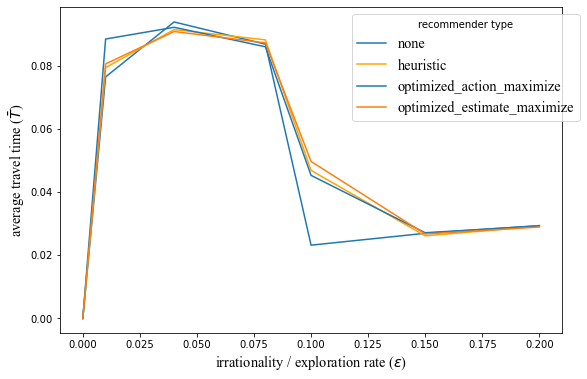

In [78]:
norms = df.norm.unique().tolist()
opt = np.ones(21) * -1.5
x_vals = np.linspace(0, 0.2, 21)
y_vals = welfare(x_vals)

plt.figure(figsize=(9,6))

means_optimizer_test.loc["none", "uniform"]["T_std"].plot(legend=True, label="none", color=u'#1f77b4')
# means_no_recommender.loc["uniform"]["T_mean"].plot(legend=True, label="none", color=u'#1f77b4')
# means_optimizer_test.loc["naive", "uniform"]["T_mean_all"].plot(legend=True, label="naive", color="red")
# means_optimizer_test.loc["random", "uniform"]["T_mean_all"].plot(legend=True, label="random", color="purple")
means_optimizer_test.loc["heuristic", "uniform"]["T_std"].plot(legend=True, label="heuristic", color="orange")

# means_optimizer_test.loc["optimized_action_minimize", "uniform"]["T_mean_all"].plot(legend=True, label="optimized_action_minimize")
means_optimizer_test.loc["optimized_action_maximize", "uniform"]["T_std"].plot(legend=True, label="optimized_action_maximize")
# means_optimizer_test.loc["optimized_estimate_minimize", "uniform"]["T_mean_all"].plot(legend=True, label="optimized_estimate_minimize")
means_optimizer_test.loc["optimized_estimate_maximize", "uniform"]["T_std"].plot(legend=True, label="optimized_estimate_maximize")

# plt.ylim((-1.4, -2.1))
# plt.yticks(ticks=np.linspace(-1.4, -2.1, 5), labels=np.linspace(1.4, 2.1, 5))

# plt.xticks(ticks=np.linspace(0, 1, 5))

# plt.plot(x_vals, opt, label="social optimum", linestyle="--", color="gray")
# plt.plot(x_vals, y_vals, label="irrational agents", linestyle=":", color="black")
plt.xlabel(r"irrationality / exploration rate ($\epsilon$)", **{"fontname": "Times New Roman", "fontsize": "x-large"})
plt.ylabel(r"average travel time ($\bar{T}$)", **{"fontname": "Times New Roman", "fontsize": "x-large"})
plt.legend(prop={"family": "Times New Roman", "size": "x-large"}, title="recommender type", bbox_to_anchor=(1.05, 1))

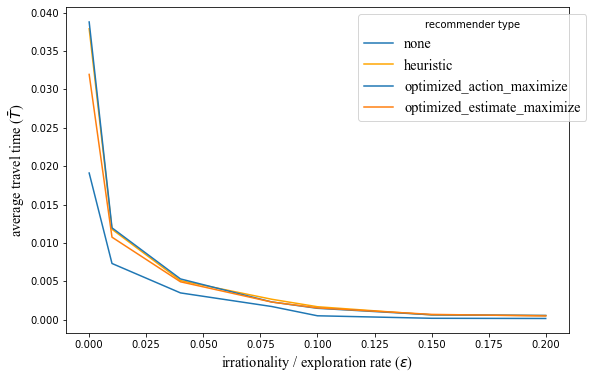

In [80]:
norms = df.norm.unique().tolist()
opt = np.ones(21) * -1.5
x_vals = np.linspace(0, 0.2, 21)
y_vals = welfare(x_vals)

plt.figure(figsize=(9,6))

means_optimizer_test.loc["none", "uniform"]["Qvar_mean"].plot(legend=True, label="none", color=u'#1f77b4')
# means_no_recommender.loc["uniform"]["T_mean"].plot(legend=True, label="none", color=u'#1f77b4')
# means_optimizer_test.loc["naive", "uniform"]["T_mean_all"].plot(legend=True, label="naive", color="red")
# means_optimizer_test.loc["random", "uniform"]["T_mean_all"].plot(legend=True, label="random", color="purple")
means_optimizer_test.loc["heuristic", "uniform"]["Qvar_mean"].plot(legend=True, label="heuristic", color="orange")

# means_optimizer_test.loc["optimized_action_minimize", "uniform"]["T_mean_all"].plot(legend=True, label="optimized_action_minimize")
means_optimizer_test.loc["optimized_action_maximize", "uniform"]["Qvar_mean"].plot(legend=True, label="optimized_action_maximize")
# means_optimizer_test.loc["optimized_estimate_minimize", "uniform"]["T_mean_all"].plot(legend=True, label="optimized_estimate_minimize")
means_optimizer_test.loc["optimized_estimate_maximize", "uniform"]["Qvar_mean"].plot(legend=True, label="optimized_estimate_maximize")

# plt.ylim((-1.4, -2.1))
# plt.yticks(ticks=np.linspace(-1.4, -2.1, 5), labels=np.linspace(1.4, 2.1, 5))

# plt.xticks(ticks=np.linspace(0, 1, 5))

# plt.plot(x_vals, opt, label="social optimum", linestyle="--", color="gray")
# plt.plot(x_vals, y_vals, label="irrational agents", linestyle=":", color="black")
plt.xlabel(r"irrationality / exploration rate ($\epsilon$)", **{"fontname": "Times New Roman", "fontsize": "x-large"})
plt.ylabel(r"average travel time ($\bar{T}$)", **{"fontname": "Times New Roman", "fontsize": "x-large"})
plt.legend(prop={"family": "Times New Roman", "size": "x-large"}, title="recommender type", bbox_to_anchor=(1.05, 1))